<a href="https://colab.research.google.com/github/apple-pie-h/ML-projects/blob/Diabetes-Prediction/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes Prediction

Super Vector Machine Model

-> one of the important algorithms of supervised learning.
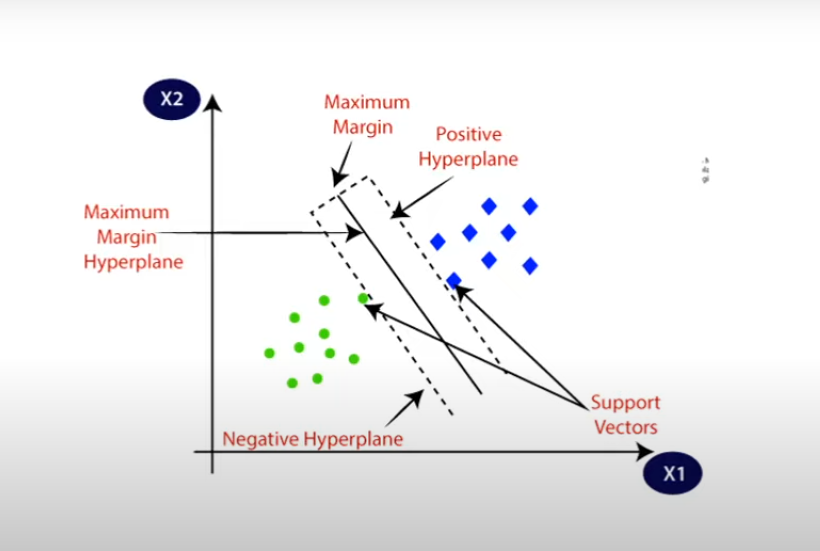

In supervised learning, we feed data to our machine learning model and it learns from the data and its respective labels. In the case of diabetes prediction, we use several medical information such as the blood glucose level and the insulin level of patient along with whether the person has diabetes or not. So, diabetic or non-diabetic acts as labels.

Once we feed the data to support vector machine, it tries to plot the data in a graph. It tries to find a hyperplane. In the figure, Hyperplane separates the two datas. If we feed new data to the model, it tries to put the new data in either side of the plane and through that it can predict if the person is diabetic or not.

In this case, we will use several medical information such as BMI of the patient, their blood glucose level, their insulin level, etc.

##Work Flow

-> Diabetes Data

-> Data pre-processing

-> Train-Test split

-> Support Vector Machine Classifier

-> Trained Support Vector Machine Classifier (on feeding new data to it, it will predict if the patient is diabetic or not)

##Coding portion:

###Importing the dependencies

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #to standardize the data
#sklearn -> scikit learn
from sklearn.model_selection import train_test_split
from sklearn import svm #svm-> support vector machine
from sklearn.metrics import accuracy_score

###Data Collection and Analysis

```
# This is formatted as code
```



In [8]:
#loading the diabetes dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [9]:
pd.read_csv? #used to see parameters of this function

SyntaxError: invalid syntax (<ipython-input-9-7c68727cf4fc>, line 1)

In [10]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1 represents patient is diabetic and 0 represents patient is non-diabetic.

In [11]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [12]:
diabetes_dataset.size #gives rows*columns

6912

In [13]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0-> non-diabetic

1-> diabetic

In [15]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
#separating the data and labels
X= diabetes_dataset.drop(columns='Outcome', axis=1) #axis=1 for colum and axis =0 for a row
Y= diabetes_dataset['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


###Data Standardization

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data= scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X=standardized_data
Y= diabetes_dataset['Outcome']